## Расчет количества экспериментов для определения эффекта

In [1]:
import numpy as np
import scipy.stats as stats
from scipy.stats import norm
import matplotlib.pyplot as plt

Для нормального распределения определим значение, вероятность превзойти, которое < 5%

In [2]:
border_val = norm.ppf(0.95)
border_val

1.6448536269514722

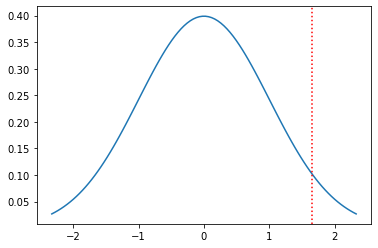

In [3]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(norm.ppf(0.01), norm.ppf(0.99), 100)
ax.plot(x, norm.pdf(x), label='norm pdf')
plt.axvline(x=border_val, color='r', linestyle=':')
plt.show()

In [4]:
# Параметры заданного распределения:
mean = 100 # Мат. ожидание
std = 8    # Стандартное отклонение
n = 16     # Число наблюдений

Z - преобразование:

<font size="5">
$Z = \frac{\overline{X} - M}{Se}$
</font>
где Se - стандартная ошибка
<font size="5">
$Se = \frac{\sigma}{\sqrt{n}}$
</font>

In [5]:
# Преобразуем для имеющегося распределения граничное значение:
z = border_val
border_val_real = z * std / n ** 0.5 + mean
border_val_real

103.28970725390295

Нулевая гепотеза: Мат. ожидание = 100:

<font size="5">
$H_0 : M = 100$
</font>

Значит, если в эксперименте мы получим значение > 103.3, то мы сможем отклонить нулевую гепотезу.

Предположим, что на самом деле мат. ожидание равно 105.  
С какой вероятностью, мы сможем отклонить нулевую (неверную) гепотезу, если у нас всего 16 наблюдений?

### Анализ мощности

In [6]:
mean2 = 105

In [7]:
#Z-преобразование для 2-го распределения для найденного ранее граничного значения:   
z2 = (border_val_real - mean2) / (std / n ** 0.5)
z2

-0.8551463730485267

In [8]:
# Найдем вероятность получить значения выше z2
proba = 1 - norm.cdf(z2)
proba

0.8037649400154936

Значит имеет 80% вероятность отклонить нулевую гепотезу

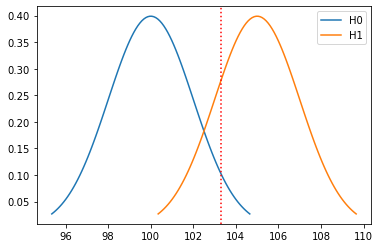

In [9]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(norm.ppf(0.01), norm.ppf(0.99), 100)
y = norm.pdf(x)

# Обратное Z-преобразование
x_pr = (std / n ** 0.5) * x + mean  
border_val_pr = (std / n ** 0.5) * border_val + mean
x_pr2 = (std / n ** 0.5) * x + mean2  

ax.plot(x_pr, y)
ax.plot(x_pr2, y)
ax.legend(['H0', 'H1'])
plt.axvline(x=border_val_pr, color='r', linestyle=':')
plt.show()

### Проведем эксперимент (частотная симуляция)

In [10]:
mu_control, sigma_control, n_control = 105, 8, 16

In [11]:
n_positive = 0
total_trials = 10000
threshold = 103.28

In [12]:
for i in range(total_trials):
    daily_data_control = np.random.normal(mu_control, sigma_control, n_control)
    
    if daily_data_control.mean() > threshold:
        n_positive += 1
        

In [13]:
n_positive / total_trials

0.8126

Получили вероятность около 80%, что совпадает с предсказанным значением

### Расчет требуемого кол-ва наблюдений для определения эффекта

Предположим, что мы хотим определить эффект 100 > 101 (было 100, стало 101).  
Сколько требуется налюдений, чтобы с 80% вероятностью обнаружить этот эффект?

Необходимо выполнить 2 условия:
- отклонить H0
- получить вероятность попадания во альтернативное распределение с вероятностью 0.8  

Найдем необходимое n, чтобы условия выполнились

In [14]:
mean0 = 100
mean1 = 101

In [15]:
z0 = norm.ppf(0.95)  # z-значение для отклонения H0  ~ 1.64
z1 = norm.ppf(0.2)   # z-значение для принятия H1  ~ -0.84

In [16]:
# Решим систему уравнений,  
# где x - наблюдаемое среднее значение (неизвестное),
# n - кол-во наблюдений (неизвестное)
# z0 = (x - mean0) / (std / n ** 0.05)
# z1 = (x - mean1) / (std / n ** 0.05)

# x = (std / n ** 0.05) * z0 + mean0
# z1 = ((std / n ** 0.05) * z0 + mean0 - mean1) / (std / n ** 0.05)
# (std / n ** 0.05) * z1 = (std / n ** 0.05) * z0 + mean0 - mean1
# (std / n ** 0.05) * (z1 - z0) = mean0 - mean1
# std / n ** 0.05 = (mean0 - mean1) / (z1 - z0)
# n ** 0.05 = std * (z1 - z0) / (mean0 - mean1)
n = (std * (z1 - z0) / (mean0 - mean1)) ** 2
n

395.68366284926503

Ответ: Нам необходимо 396 наблюдений

### Проведем еще один эксперимент с новыми данными (частотная симуляция)

In [17]:
mu_control, sigma_control, n_control = 101, 8, 396

In [18]:
n_positive = 0
total_trials = 10000
threshold = (std / n_control ** 0.5) * norm.ppf(0.95) + mean0 # ~100.66 - порог отклонения H0

In [19]:
for i in range(total_trials):
    daily_data_control = np.random.normal(mu_control, sigma_control, n_control)
    
    if daily_data_control.mean() > threshold:
        n_positive += 1

In [20]:
n_positive / total_trials

0.8082

Примерно получаем предсказанную вероятность 0.8

На практике мы никогда не знаем стандартное отклонение в генеральной совокупности.  
Поэтому вместо z-теста используется t-тест.  
Для перехода к t-тесту надо использовать другую стандартнцю ошибку Se,  
в которой вместо std использовать выборочную дисперсию

### Альтернативный расчет через стандартные библиотеки

In [21]:
from statsmodels.stats.power import TTestIndPower

In [22]:
# Параметры выборок
mu_control,    sigma_control    = 100, 8
mu_experiment, sigma_experiment = 110, 8

In [23]:
d = (mu_experiment - mu_control) / ((sigma_control**2 + sigma_experiment**2) / 2) ** 0.5

In [24]:
d

1.25

In [25]:
effect = d
alpha = 0.05  # p_value для отклонения H0
power = 0.95  # мощность AB-теста
# perform power analysis
analysis = TTestIndPower()
result = analysis.solve_power(effect, power=power, nobs1=None, ratio=1.0, alpha=alpha)
print('Sample Size: %.3f' % result)  # Требуемое количество наблюдений

Sample Size: 17.655


### И еще одна симуляция

In [26]:
n_control = n_experiment = 18

total_trials = 1000
n_positive = 0

In [27]:
for i in range(total_trials):
    daily_data_control = np.random.normal(mu_control, sigma_control, n_control)
    daily_data_experiment = np.random.normal(mu_experiment, sigma_experiment, n_experiment)

    fit = stats.ttest_ind(daily_data_control, 
                          daily_data_experiment)
    
    if fit[1] < 0.05:
        n_positive += 1

In [28]:
n_positive / total_trials

0.943